In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import math
import warnings
from random import randint
import seaborn as sb #for Data Visualization
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import GridSearchCV
from sklearn.base import clone

In [55]:
cd /kaggle/input/house-prices-advanced-regression-techniques

/kaggle/input/house-prices-advanced-regression-techniques


In [ ]:
ls

In [7]:
df = pd.read_csv('train.csv')

In [ ]:
df.head()

<AxesSubplot:>

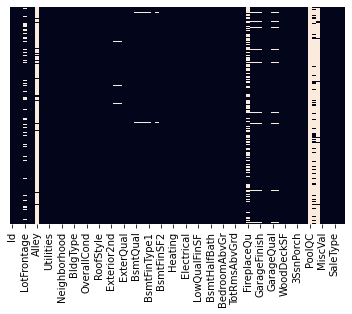

In [8]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [9]:
ts = pd.read_csv('test.csv')

In [ ]:
ts.isnull().sum()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [11]:
df.drop(['Alley'],axis=1,inplace=True)

In [12]:
df['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [13]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

In [14]:
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [15]:
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])


In [16]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [17]:
df.shape

(1460, 77)

<AxesSubplot:>

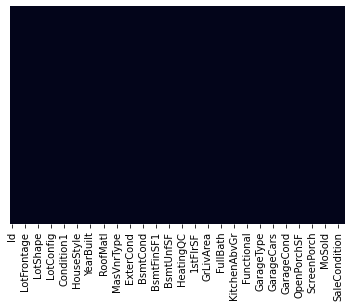

In [18]:
sb.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
ts.info()

In [19]:
from array import *
arr = ['MSZoning','Utilities','Exterior1st','Exterior2nd','MasVnrType','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond']
for i in arr:
    ts[i]=ts[i].fillna(ts[i].mode()[0])

In [20]:
arr1 = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageYrBlt','GarageCars','GarageArea']
for i in arr1:
    ts[i]=ts[i].fillna(ts[i].mean())

In [21]:
ts.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

<AxesSubplot:>

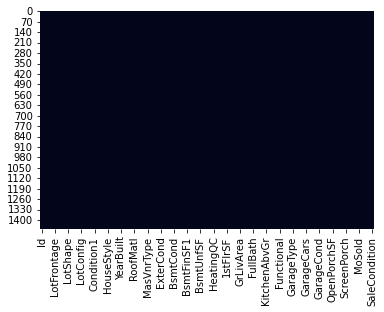

In [22]:
sb.heatmap(ts.isnull(),cbar=False)

In [23]:
ts.shape

(1459, 76)

In [24]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000000,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000000,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,70.049958,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000000,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000000,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [25]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']
len(columns)

39

In [26]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [27]:
main_df=df.copy()

In [28]:
final_df=pd.concat([df,ts],axis=0)

In [29]:
final_df.shape

(2919, 77)

In [30]:
final_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,NaN


In [31]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [32]:
final_df.shape

(2919, 238)

In [33]:
final_df.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y
0,1,60,65.000000,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,1,0,1
1,2,20,80.000000,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,1,0,1
2,3,60,68.000000,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,1,0,1
3,4,70,60.000000,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,0,0,0,1,0,1
4,5,60,84.000000,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,1,0,1
5,6,50,85.000000,14115,5,5,1993,1995,0.0,732.0,...,0,0,0,1,0,0,0,1,0,1
6,7,20,75.000000,10084,8,5,2004,2005,186.0,1369.0,...,0,0,0,1,0,0,0,1,0,1
7,8,60,70.049958,10382,7,6,1973,1973,240.0,859.0,...,0,0,0,1,0,0,0,1,0,1
8,9,50,51.000000,6120,7,5,1931,1950,0.0,0.0,...,1,0,0,0,0,0,0,1,0,1
9,10,190,50.000000,7420,5,6,1939,1950,0.0,851.0,...,0,1,0,0,0,0,0,1,0,1


In [34]:
final_df=final_df.loc[:,~final_df.columns.duplicated()]

In [35]:
final_df.shape

(2919, 178)

In [36]:
df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]

In [37]:
df_Train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,1,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,1,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,1,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,1,0,0,0,0,1,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,1,1,0,0,0,0,1,0


In [38]:
df_Train.shape

(1460, 178)

In [39]:
df_Test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,1,1,0,0,0,0,0,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,1,1,0,0,0,0,0,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,1,1,0,0,0,0,0,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,1,1,0,0,0,0,0,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,1,1,0,0,0,0,1,0


In [40]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 178 entries, Id to P
dtypes: float64(12), int64(26), uint8(140)
memory usage: 644.5 KB


In [42]:
df_Test.shape

(1459, 178)

In [43]:

X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [44]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,1,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,1,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,1,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,1,0,0,0,0,1,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,1,1,0,0,0,0,1,0


In [46]:
y_train.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [47]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
df_Test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,1,1,0,0,0,0,0,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,1,1,0,0,0,0,0,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,1,1,0,0,0,0,0,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,1,1,0,0,0,0,0,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,1,0,0,0,1,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,1,0,0,0,0,1,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,1,1,0,0,0,0,0,0


In [50]:
df_Test['LotFrontage']

0        80.0
1        81.0
2        74.0
3        78.0
4        43.0
        ...  
1454     21.0
1455     21.0
1456    160.0
1457     62.0
1458     74.0
Name: LotFrontage, Length: 1459, dtype: float64

In [51]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [54]:
import pickle
filename = 'model.pkl'
pickle.dump(classifier,open(filename,'wb'))

In [53]:
cd /kaggle/working/

/kaggle/working


In [66]:
cd /kaggle/input/house-prices-advanced-regression-techniques

/kaggle/input/house-prices-advanced-regression-techniques


In [58]:
y_pred=classifier.predict(df_Test)

In [59]:
y_pred

array([131849.36 , 153356.11 , 183102.56 , ..., 180415.45 ,  89140.234,
       220015.08 ], dtype=float32)

In [61]:
pred=pd.DataFrame(y_pred)

In [63]:
sub=pd.DataFrame({'Id':[i for i in range(1461,2920)],'SalePrice':y_pred})

In [68]:
cd /kaggle/working/

/kaggle/working


In [65]:
sub.to_csv('submission.csv')

In [67]:
ss=pd.read_csv('sample_submission.csv')
dt=pd.concat([ss['Id'],pred],axis=1)
dt.columns=['Id','SalePrice']


In [69]:
dt.to_csv('submission1.csv',index=False)